First, the system without being able to fight back against the zombies

In [110]:
import numpy as np
import matplotlib.pyplot as plt



In [111]:
def no_fighting_back(l1, l2, l3, N, m, t):
    #At the end, it should output the fraction of trials in which everyone ended up infected
    all_infected = 0
    
    #need to complete t trials
    for i in range(t):
        deaths = 0
        infected = m
        healthy = N-m

        while infected > 0:
            dI = l1*infected*(healthy/N)
            dD = l2*infected

            #preventing division by zero
            if dI == 0: dI = 1e-10
            if dD == 0: dD = 1e-10
            
            #dont want negative numbers; keep np happy
            dI = abs(dI)
            dD = abs(dD)
            
            #sampling from a random dist
            sampleI, sampleD = np.random.exponential(1/dI), np.random.exponential(1/dD)
            min_samp = min(sampleI, sampleD)
            if min_samp == sampleI:
                #move from healthy to infected
                infected += 1
                healthy -= 1
            else:
                #moving from infected to dead
                infected -= 1
                deaths+=1

        if healthy <= 0: all_infected += 1 #we have run out of healthy people
    
    return (all_infected/t) #fraction no healthy

Now consider we are fighting back:

In [112]:
def fighting_back(l1, l2, l3, N, m, t):
    #At the end, it should output the fraction of trials in which everyone ended up infected
    all_infected = 0

    #need to complete t trials
    for i in range(t):
        deaths = 0
        infected = m
        healthy = N-m

        while infected > 0:
            dI = l1*infected*(healthy/N)
            dD = l2*infected + (l3*healthy*infected / (healthy + infected + deaths)) #introducing a zombie death rate.

            #preventing division by zero
            if dI == 0: dI = 1e-10
            if dD == 0: dD = 1e-10

            #dont want negative numbers; keep np happy
            dI = abs(dI)
            dD = abs(dD)

            #sampling from a random dist
            sampleI, sampleD = np.random.exponential(1/dI), np.random.exponential(1/dD)
            min_samp = min(sampleI, sampleD)
            if min_samp == sampleI:
                #move from healthy to infected
                infected += 1
                healthy -= 1
            else:
                #moving from infected to dead
                infected -= 1
                deaths+=1

        if healthy <= 0: all_infected += 1 #we have run out of healthy people
        

    return (all_infected/t) #fraction no healthy

In [113]:
N = 10000
m = 100
l1 = 1.5
l3 = 1
t = 100
l2vals = [.001, .01, .1, 1, 10, 100]

fb = []
nfb = []

for l2 in l2vals:
    #fighting_back_res.append(fighting_back(l1, l2, l3, N, m, t))
    nfb.append(no_fighting_back(l1, l2, l3, N, m, t))
    fb.append(fighting_back(l1, l2, l3, N, m, t))
    

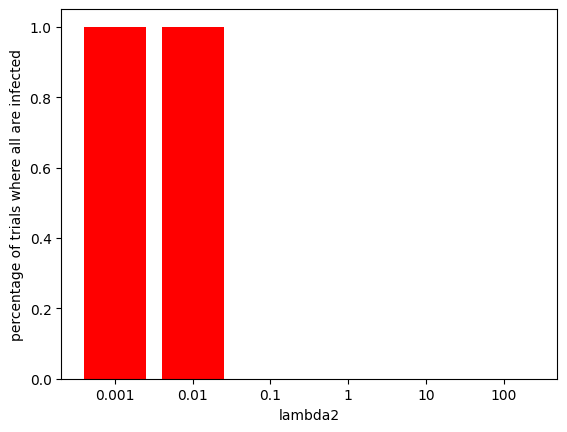

In [114]:
plt.bar([str(l2) for l2 in l2vals], fb, color = "red")

plt.xlabel("lambda2")
plt.ylabel("percentage of trials where all are infected")
plt.show()

What happens if we do not fight back?

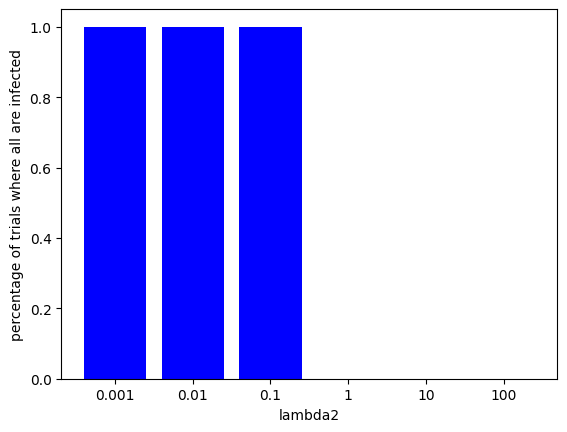

In [115]:
plt.bar([str(l2) for l2 in l2vals], nfb, color = "blue")
plt.xlabel("lambda2")
plt.ylabel("percentage of trials where all are infected")
plt.show()